# Cluster a la submuestra de 13 a 17 en edad, de forma multivariada

In [1]:
import gower
import pandas as pd
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import linkage, dendrogram

In [2]:
df = pd.read_csv("13-17_usable.csv",parse_dates=["fecha_de_localizacion", "fecha_reporte"])
df.head(2)

C:\Users\diego\AppData\Local\Temp\ipykernel_14960\695974428.py:1: DtypeWarning: Columns (4,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("13-17_usable.csv",parse_dates=["fecha_de_localizacion", "fecha_reporte"])


,registro_nacional,fecha_reporte,fecha_evento,estado,clave_estado,municipio,clave_municipio,nacionalidad,estatus_migratorio,sexo,...,clasificacion_causal,causal,year_reporte,year_evento,dias_de_busqueda_reporte,dias_de_busqueda_evento,year_birthday,edad_calculada,dif_edad,tiempo_perdido
0,desaparecido,2011-12-10 10:30:00,2009-09-02 02:30:00,tlaxcala,29,tlaxcala,33,mexicana,no_especificado,femenino,...,_,_,2011,2009,NaN,NaN,1995.0,16.0,3.0,829 days 08:00:00
1,desaparecido,2012-02-01 11:41:00,2011-12-14 11:00:00,colima,6,tecoman,9,mexicana,no_especificado,femenino,...,_,_,2012,2011,-27 days +00:19:00,22 days 01:00:00,1996.0,16.0,1.0,49 days 00:41:00


In [3]:
df["fecha_reporte"] = pd.to_datetime(df['fecha_reporte']).dt.date
df["fecha_de_localizacion"] = pd.to_datetime(df['fecha_de_localizacion']).dt.date
df.head()

,registro_nacional,fecha_reporte,fecha_evento,estado,clave_estado,municipio,clave_municipio,nacionalidad,estatus_migratorio,sexo,...,clasificacion_causal,causal,year_reporte,year_evento,dias_de_busqueda_reporte,dias_de_busqueda_evento,year_birthday,edad_calculada,dif_edad,tiempo_perdido
0,desaparecido,2011-12-10,2009-09-02 02:30:00,tlaxcala,29,tlaxcala,33,mexicana,no_especificado,femenino,...,_,_,2011,2009,NaN,NaN,1995.0,16.0,3.0,829 days 08:00:00
1,desaparecido,2012-02-01,2011-12-14 11:00:00,colima,6,tecoman,9,mexicana,no_especificado,femenino,...,_,_,2012,2011,-27 days +00:19:00,22 days 01:00:00,1996.0,16.0,1.0,49 days 00:41:00
2,desaparecido,2012-09-02,2012-06-02 12:00:00,colima,6,manzanillo,7,mexicana,no_especificado,femenino,...,_,_,2012,2012,2 days 14:25:00,94 days 13:25:00,1997.0,15.0,1.0,91 days 23:00:00
3,desaparecido,2012-10-02,2012-09-02 09:13:00,colima,6,manzanillo,7,mexicana,no_especificado,femenino,...,_,_,2012,2012,-230 days +22:40:00,-199 days +00:47:00,1997.0,15.0,1.0,30 days 02:07:00
4,desaparecido,2012-02-13,2012-11-02 11:00:00,colima,6,colima,2,mexicana,no_especificado,femenino,...,_,_,2012,2012,366 days 01:40:00,103 days 01:00:00,NaN,NaN,NaN,-264 days +23:20:00


In [4]:
submuestra = df[["estado", "sexo", "vivo_o_muerto", "estado_localizado", "fecha_reporte", "fecha_de_localizacion", "edad"]]
submuestra.head()

,estado,sexo,vivo_o_muerto,estado_localizado,fecha_reporte,fecha_de_localizacion,edad
0,tlaxcala,femenino,aun_sin_localizar,no_especificado,2011-12-10,NaT,13.0
1,colima,femenino,vivo,colima,2012-02-01,2012-01-05,15.0
2,colima,femenino,vivo,no_especificado,2012-09-02,2012-09-05,14.0
3,colima,femenino,vivo,no_especificado,2012-10-02,2012-02-16,14.0
4,colima,femenino,vivo,no_especificado,2012-02-13,2013-02-13,17.0


In [5]:
submuestra["dias_busqueda"] = (submuestra['fecha_de_localizacion'] - submuestra['fecha_reporte'])
submuestra.dias_busqueda.head()

C:\Users\diego\AppData\Local\Temp\ipykernel_14960\1329838945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submuestra["dias_busqueda"] = (submuestra['fecha_de_localizacion'] - submuestra['fecha_reporte'])


0                   NaN
1     -27 days, 0:00:00
2       3 days, 0:00:00
3    -229 days, 0:00:00
4     366 days, 0:00:00
Name: dias_busqueda, dtype: object

In [6]:
submuestra.nunique()

estado                     33
sexo                        2
vivo_o_muerto               3
estado_localizado          35
fecha_reporte            3722
fecha_de_localizacion    3517
edad                        5
dias_busqueda            2507
dtype: int64

In [7]:
submuestra = submuestra.drop(["fecha_de_localizacion", "fecha_reporte"],axis=1)
submuestra.head()

,estado,sexo,vivo_o_muerto,estado_localizado,edad,dias_busqueda
0,tlaxcala,femenino,aun_sin_localizar,no_especificado,13.0,NaN
1,colima,femenino,vivo,colima,15.0,"-27 days, 0:00:00"
2,colima,femenino,vivo,no_especificado,14.0,"3 days, 0:00:00"
3,colima,femenino,vivo,no_especificado,14.0,"-229 days, 0:00:00"
4,colima,femenino,vivo,no_especificado,17.0,"366 days, 0:00:00"


In [8]:
distance_matrix = gower.gower_matrix(submuestra)
distance_matrix

array([[0.16666667, 0.75      , 0.5416667 , ..., 0.75      , 0.75      ,
        0.7916667 ],
       [0.75      , 0.        , 0.375     , ..., 0.5       , 0.5       ,
        0.5416667 ],
       [0.5416667 , 0.375     , 0.        , ..., 0.5416667 , 0.5416667 ,
        0.5833333 ],
       ...,
       [0.75      , 0.5       , 0.5416667 , ..., 0.        , 0.        ,
        0.5416667 ],
       [0.75      , 0.5       , 0.5416667 , ..., 0.        , 0.        ,
        0.5416667 ],
       [0.7916667 , 0.5416667 , 0.5833333 , ..., 0.5416667 , 0.5416667 ,
        0.        ]], dtype=float32)

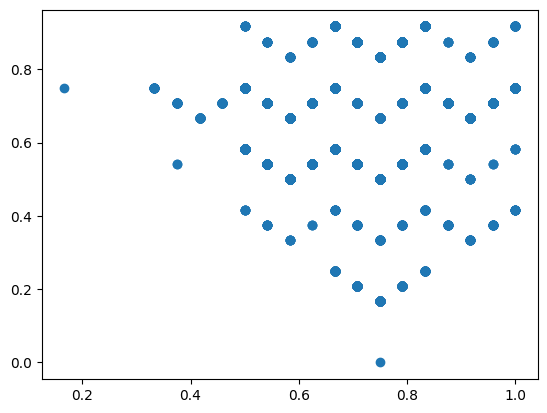

In [9]:
plt.scatter(distance_matrix[:,0], distance_matrix[:,1])

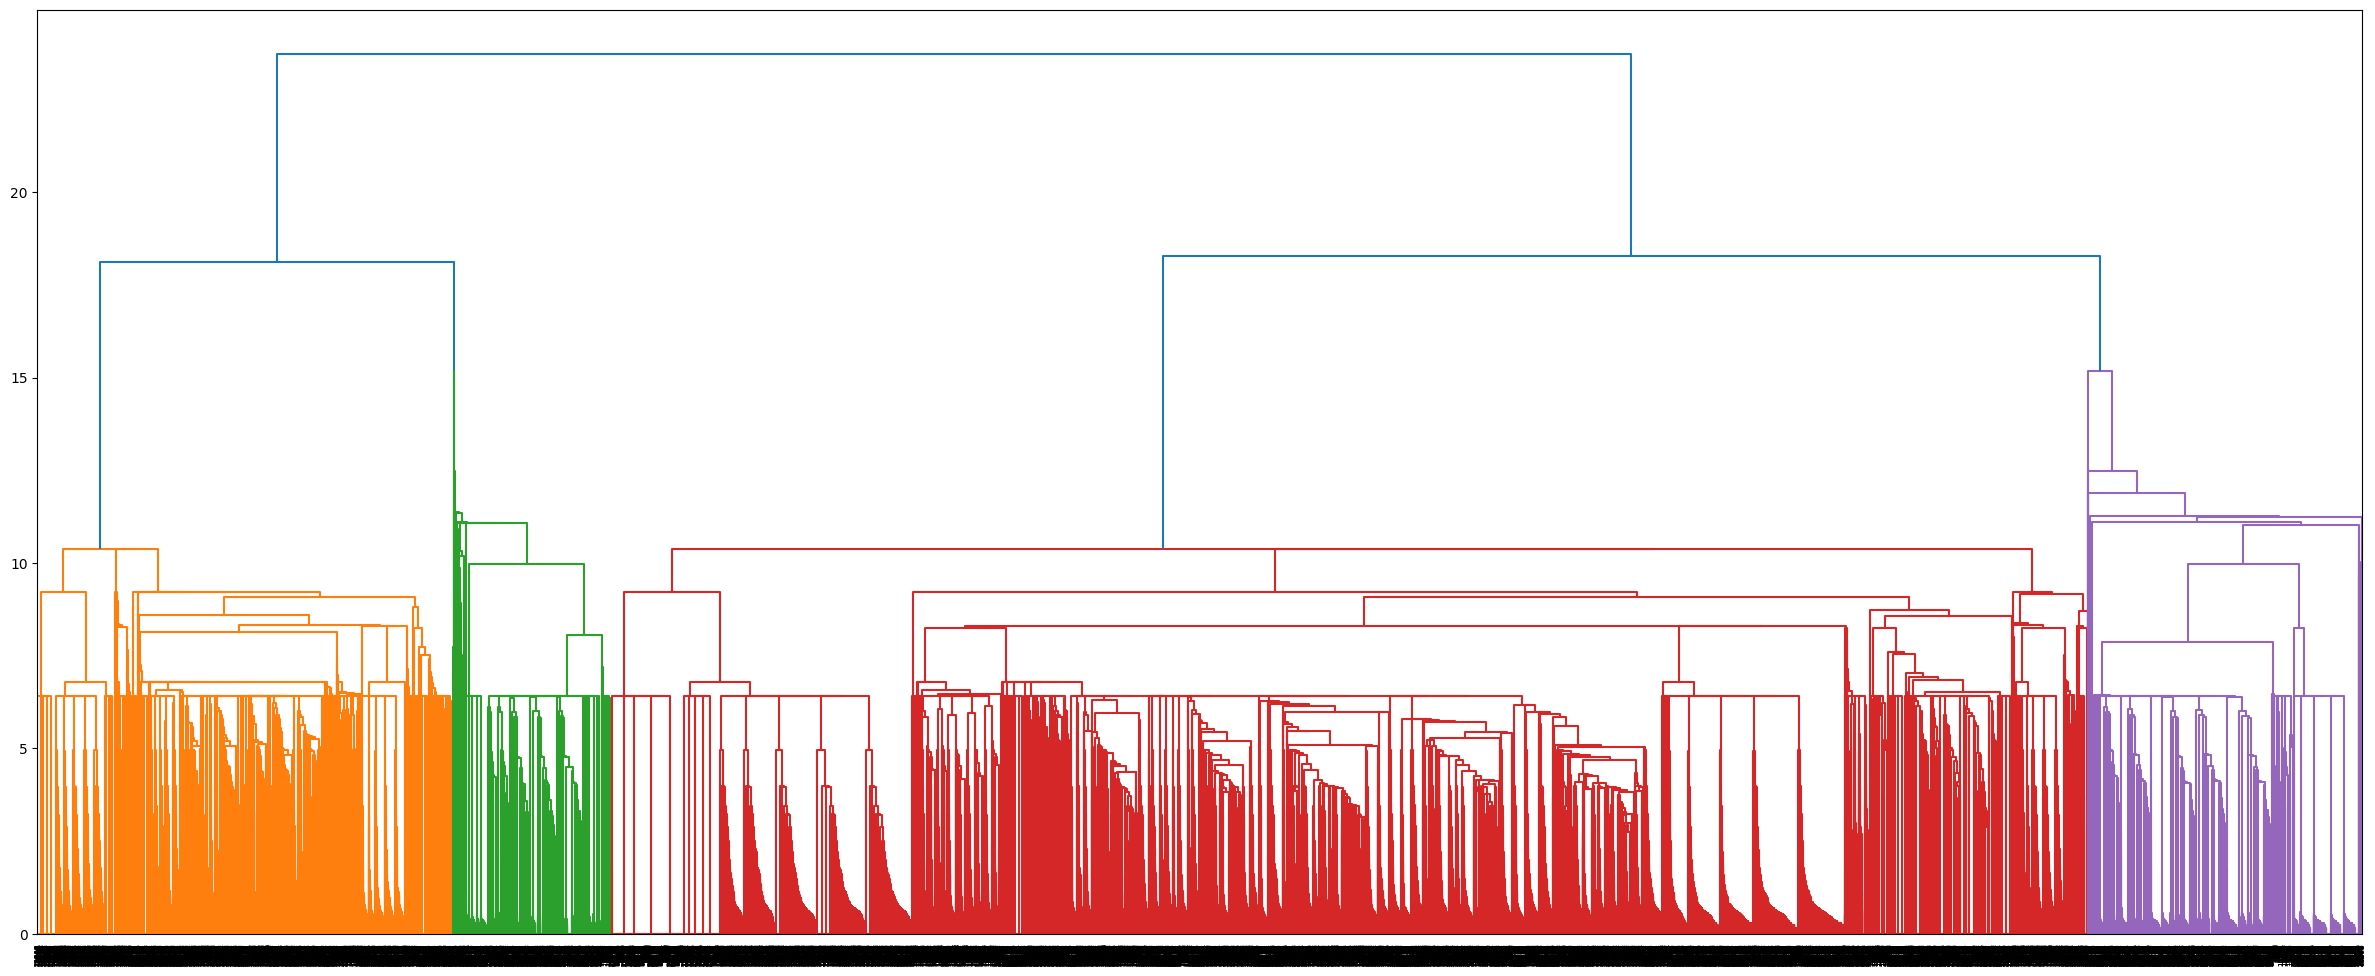

In [10]:
clusters_single = linkage(distance_matrix, "single")
plt.figure(figsize=(30,12))
dendrogram(clusters_single)
plt.show()

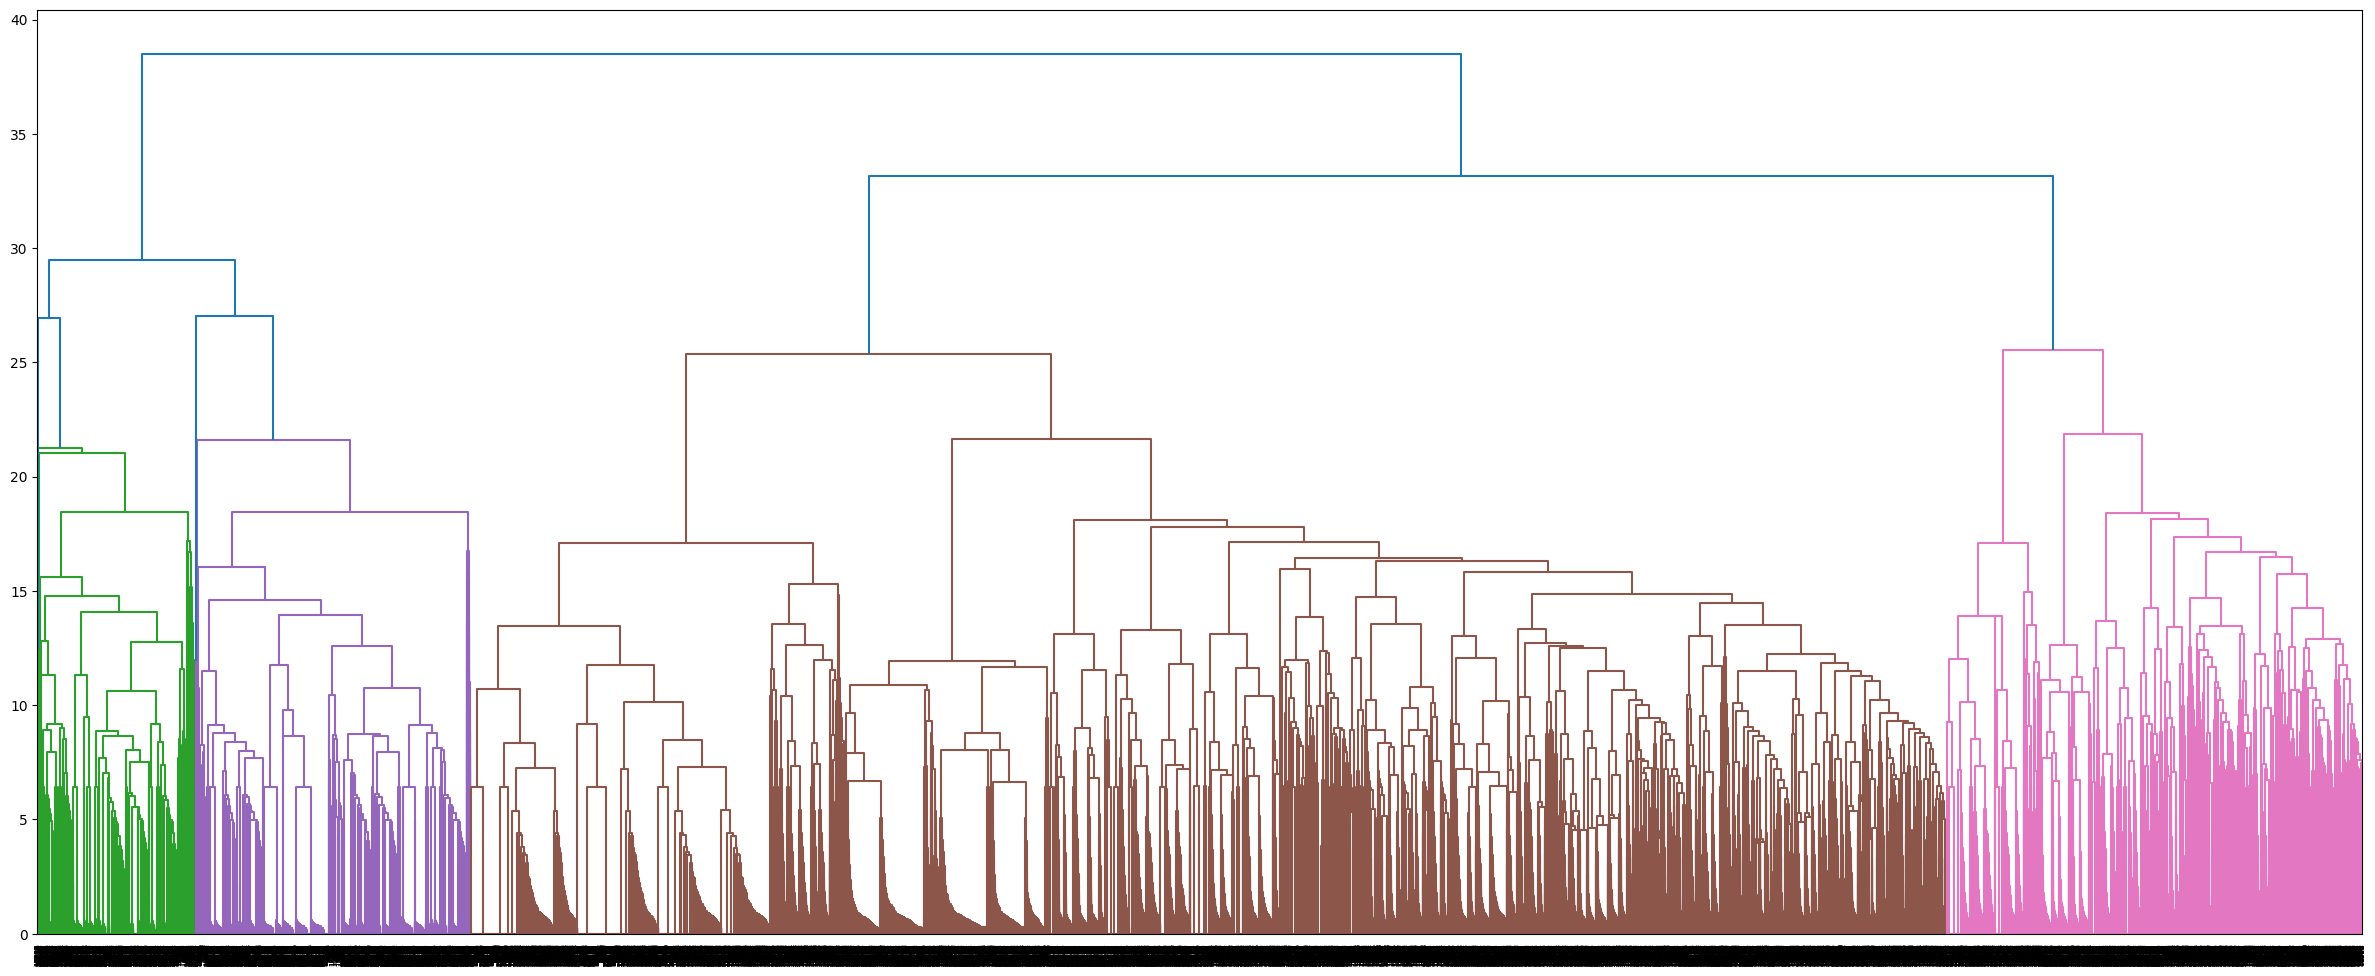

In [11]:
clusters_avg = linkage(distance_matrix, "average")
plt.figure(figsize=(30,12))
dendrogram(clusters_avg)
plt.show()

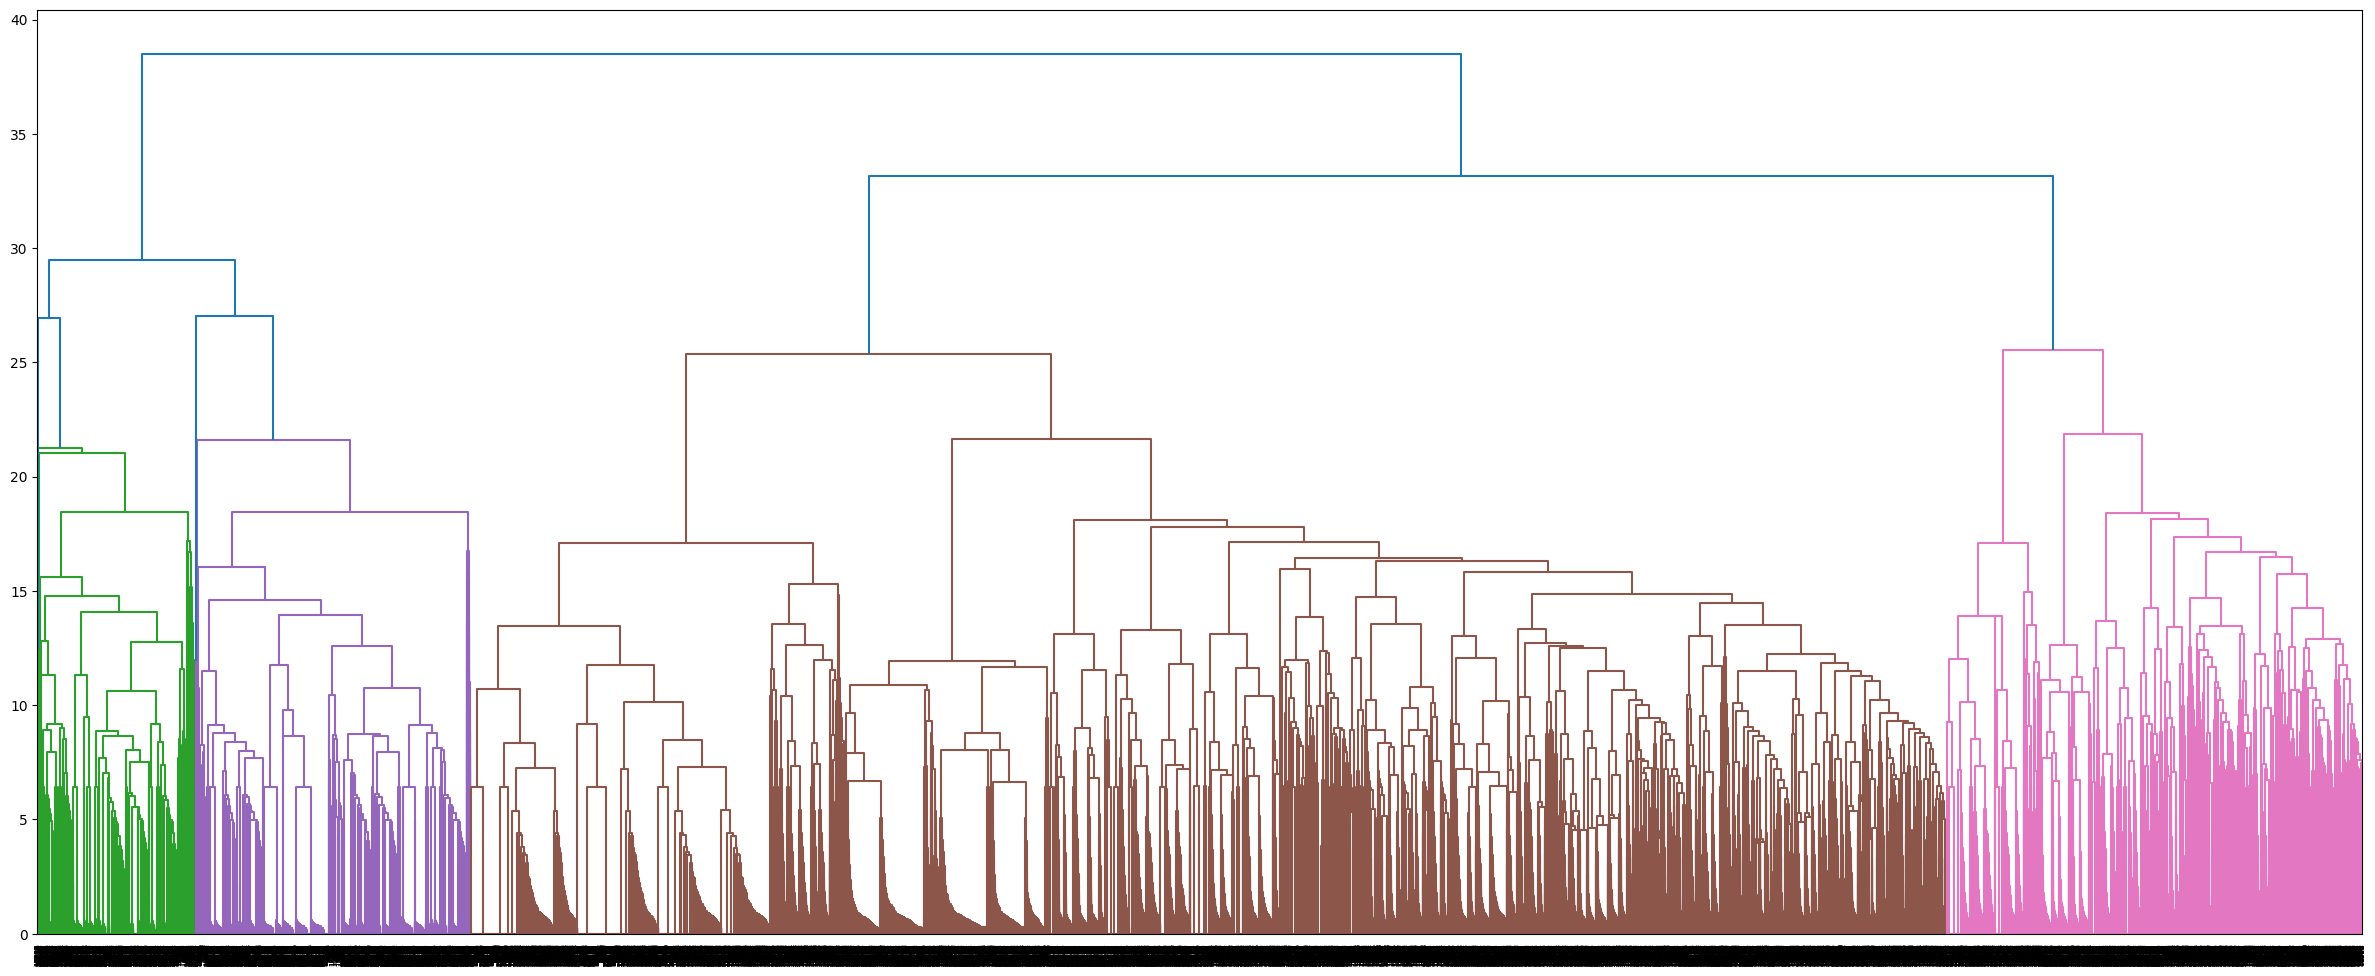

In [18]:
clusters_cmpt = linkage(distance_matrix, "complete")
plt.figure(figsize=(30,12))
dendrogram(clusters_avg)
plt.show()

## Single Linkage

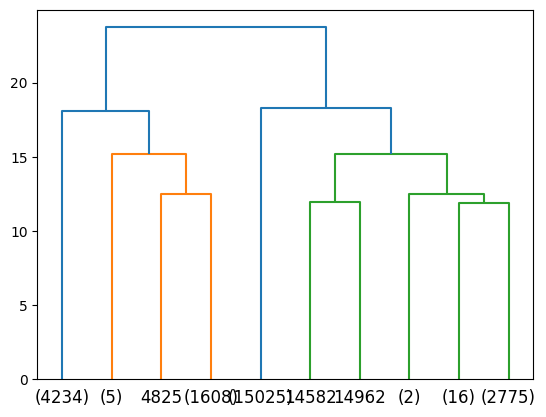

In [13]:
dendrogram(clusters_single, truncate_mode='lastp', p=10)
plt.show()

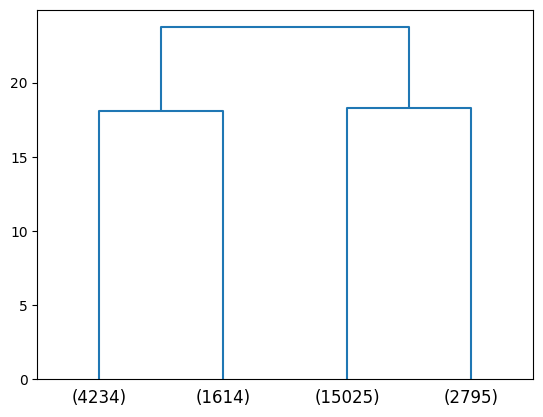

In [14]:
dendrogram(clusters_single, truncate_mode='lastp', p=4)
plt.show()

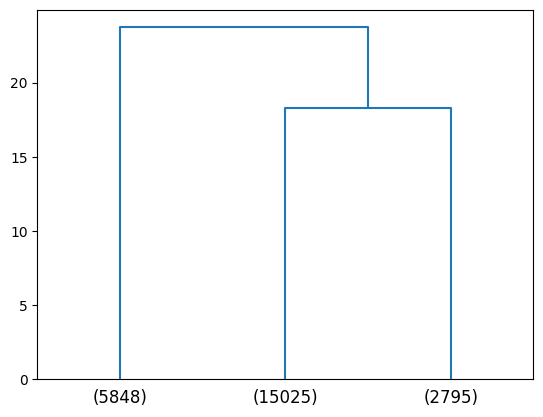

In [15]:
dendrogram(clusters_single, truncate_mode='lastp', p=3)
plt.show()

## Average Linkage

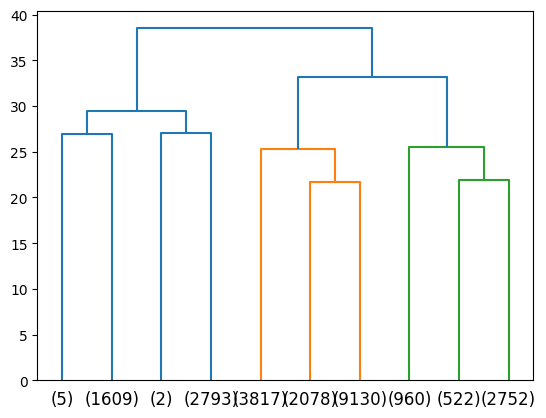

In [16]:
dendrogram(clusters_avg, truncate_mode='lastp', p=10)
plt.show()

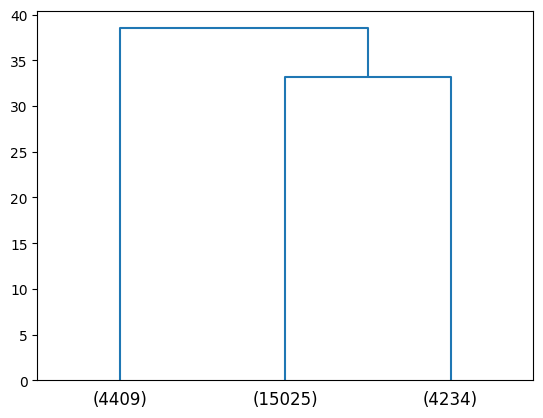

In [17]:
dendrogram(clusters_avg, truncate_mode='lastp', p=3)
plt.show()

## Complete Linkage

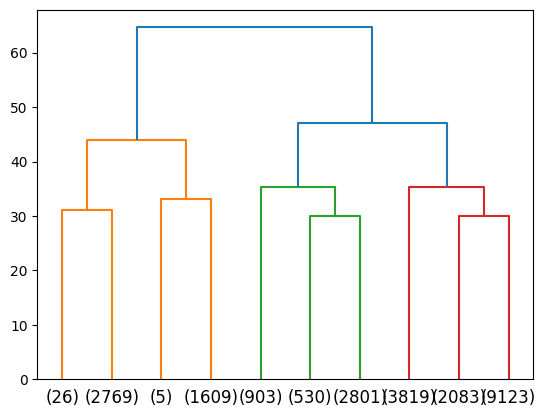

In [19]:
dendrogram(clusters_cmpt, truncate_mode='lastp', p=10)
plt.show()

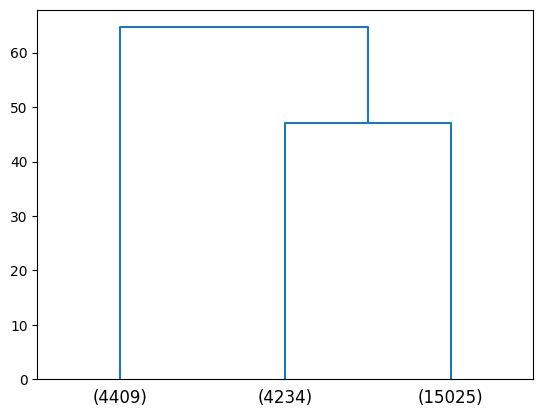

In [20]:
dendrogram(clusters_cmpt, truncate_mode='lastp', p=3)
plt.show()

In [22]:
from scipy.cluster.hierarchy import fcluster

hier_clusters = fcluster(clusters_cmpt, 45, criterion='distance')
len(set(hier_clusters))

3

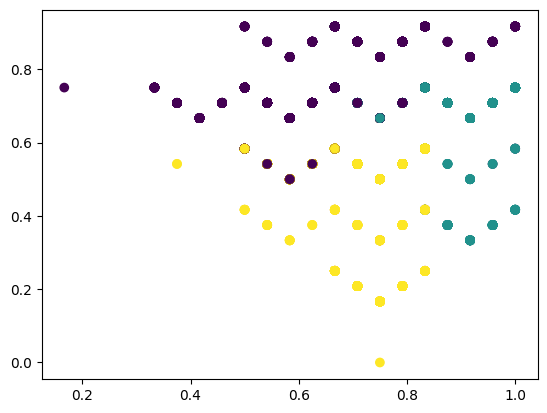

In [23]:
plt.scatter(distance_matrix[:,0], distance_matrix[:,1], c=hier_clusters)

In [24]:
from scipy.cluster.hierarchy import cut_tree 

cluster_labels = cut_tree(clusters_cmpt, n_clusters=3).reshape(-1, )
submuestra["cluster"] = cluster_labels

In [25]:
submuestra["cluster"].value_counts()

cluster
1    15025
0     4409
2     4234
Name: count, dtype: int64

In [26]:
submuestra.head()

,estado,sexo,vivo_o_muerto,estado_localizado,edad,dias_busqueda,cluster
0,tlaxcala,femenino,aun_sin_localizar,no_especificado,13.0,NaN,0
1,colima,femenino,vivo,colima,15.0,"-27 days, 0:00:00",1
2,colima,femenino,vivo,no_especificado,14.0,"3 days, 0:00:00",1
3,colima,femenino,vivo,no_especificado,14.0,"-229 days, 0:00:00",1
4,colima,femenino,vivo,no_especificado,17.0,"366 days, 0:00:00",1


In [27]:
submuestra.to_csv('13-17_clustered.csv', index=False)